<a href="https://colab.research.google.com/github/KimNamHo2020/OpenCV-ss/blob/main/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다양한 필터를 적용하여 처리하는 과정을 보여줍니다

*  이미지를 읽어 RGB 및 그레이스케일로 변환합니다.
*   다양한 크기의 평균 필터를 사용해 블러 효과를 적용합니다.
엣지 검출 커널을 사용해 이미지 경계를 강조하고, 이를 시각화합니다.




In [ ]:

from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


(256, 256)


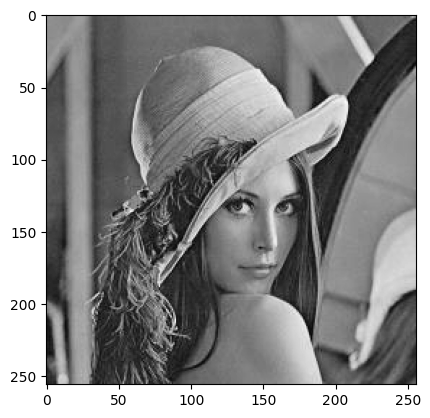

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/디지털영상처리/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

In [ ]:

kernel3 = np.ones((3,3),np.float32)/9


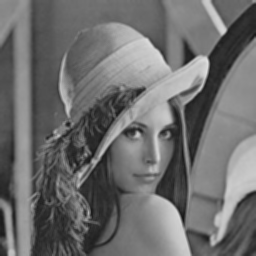

In [ ]:

out3Img = cv2.filter2D(gImg,-1,kernel3)
cv2_imshow(out3Img)


In [ ]:
kernel5 = np.ones((5,5),np.float32)/25

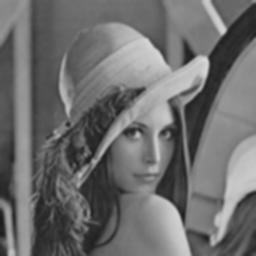

In [ ]:
out33Img = cv2.filter2D(out3Img,-1,kernel3)
cv2_imshow(out33Img)

In [ ]:
kernel3[0][0] = -1/9
kernel3[0][1] = -1/9
kernel3[0][2] = -1/9
kernel3[1][0] = -1/9
kernel3[1][1] = 8/9
kernel3[1][2] = -1/9
kernel3[2][0] = -1/9
kernel3[2][1] = -1/9
kernel3[2][2] = -1/9

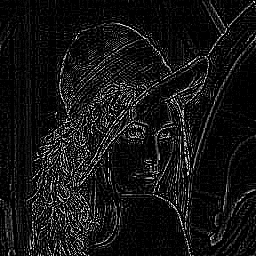

In [ ]:
out3Img = cv2.filter2D(gImg,-1,kernel3)
out3Img=out3Img *10
cv2_imshow(out3Img)

salt-and-pepper 노이즈를 추가한 후 이를 중간값 필터로
제거하는 과정을 보여줍니다
*  원본 이미지를 읽어와 그레이스케일로 변환합니다.
*   Salt-and-Pepper 노이즈를 추가하여 무작위로 픽셀 값을 변경합니다.
*   중간값 필터를 적용하여 노이즈를 제거합니다. 커널 크기를 조정하며 효과를 비교합니다.



*  Salt-and-Pepper 노이즈: 일부 픽셀을 0(검은색) 또는 255(흰색)으로 변경하는 노이즈.
*   중간값 필터: 노이즈 제거를 위해 각 커널의 중간값으로 픽셀을 대체하는 방법. Salt-and-Pepper 노이즈 제거에 효과적입니다.





제거하는 과정을 보여줍니다.

(256, 256)


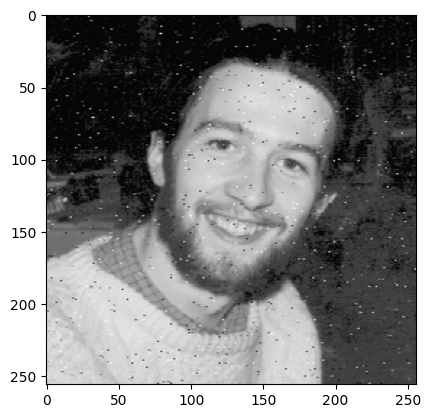

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/디지털영상처리/fce(salt_pepper noise).bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

In [ ]:
noiseimg = gImg.copy()

In [ ]:
from random import randint

In [ ]:
noiseRatio = 20
whiteMax = noiseRatio/2
blackMax = noiseRatio

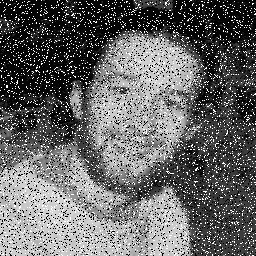

In [ ]:
noiseimg = gImg.copy()

for h in range(0, gImg.shape[0]):
  for w in range(0, gImg.shape[1]):
    val = randint(0, 100)
    if(val < whiteMax):
      noiseimg[h, w] = 255
    elif(val < blackMax):
      noiseimg[h, w]= 0

cv2_imshow(noiseimg)

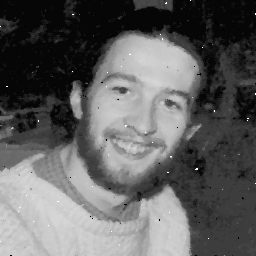

In [ ]:
outImg =cv2.medianBlur(noiseimg,3)
cv2_imshow(outImg)


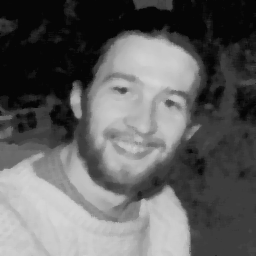

In [ ]:
outImg2 =cv2.medianBlur(noiseimg,5)
cv2_imshow(outImg2)


**가우시안 블러**와 **평균 블러링**을 적용하고, 이를 이용해 엣지 강조 효과를 생성하는 과정을 보여줍니다.

*   가우시안 블러: 가우시안 커널을 사용하여 노이즈 제거 및 이미지 부드럽게 처리.
*   평균 블러: 단순한 커널 평균을 사용하여 이미지 블러링.
*   엣지 강조: 평활화된 이미지를 원본에서 빼 엣지를 추출하고 이를 원본과 결합해 선명도 증가.








(256, 256)


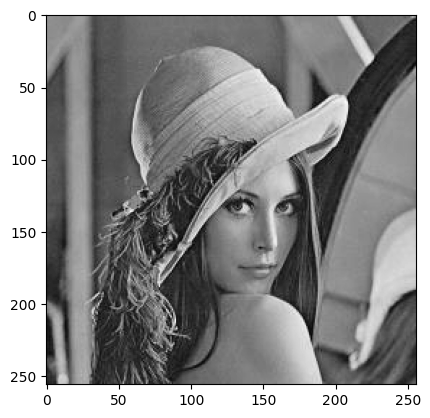

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/디지털영상처리/lena256.jpg')

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')


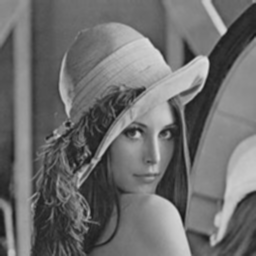

In [ ]:
outImg=cv2.GaussianBlur(gImg,(3,3),1)
cv2_imshow(outImg)

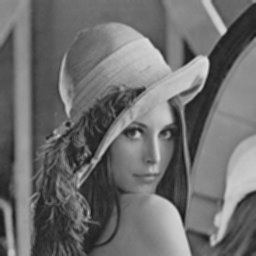

In [ ]:
outImg=cv2.GaussianBlur(gImg,(3,3),3)
cv2_imshow(outImg)

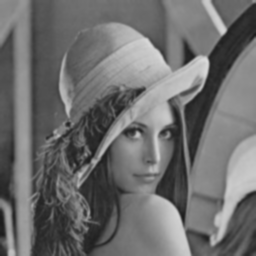

In [ ]:
outImg=cv2.GaussianBlur(gImg,(7,7),1)
cv2_imshow(outImg)

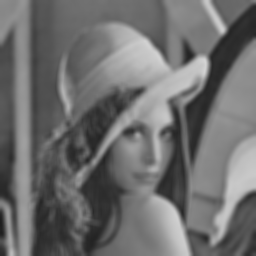

In [ ]:
outImg=cv2.GaussianBlur(gImg,(7,7),3)
cv2_imshow(outImg)

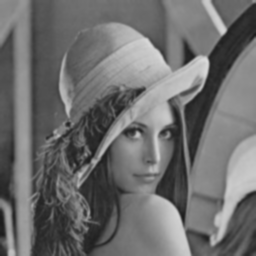

In [ ]:
outImg=cv2.GaussianBlur(gImg,(15,15),1)
cv2_imshow(outImg)

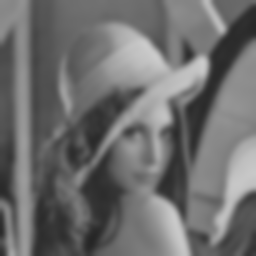

In [ ]:
outImg=cv2.GaussianBlur(gImg,(15,15),3)
cv2_imshow(outImg)

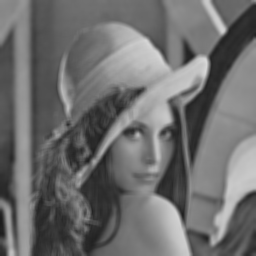

In [ ]:
mean_img=cv2.blur(gImg,(5,5))
cv2_imshow(mean_img)

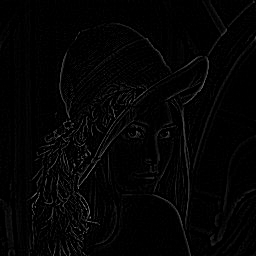

In [ ]:
edge_Img=cv2.addWeighted(gImg,1.0, mean_img,-1.0, 0)
cv2_imshow(edge_Img)

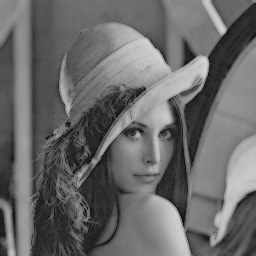

In [ ]:
out_img =cv2.addWeighted(gImg,1.0,edge_Img,-1.0, 0)
cv2_imshow(out_img )